# Superstore Sales Analysis

This project analyzes data from a fictional retail chain.

We will explore trends and patterns to make conclusions to support better business practices.

**Tools**

    - Python
    - Jupyter Notebook
    - Pandas
    - Numpy
    - Matplotlib
    - Seaborn
    - Plotly
    - Scikitlearn
    - Statsmodels
    - Pmdarima

**Objectives**

    - Examine monthly sales and profit.
    - Evaluate how discounts affect sales and profit.
    - Analyze the performance of products by category/sub-category.
    - Look at segments of customers.
    - Examine differences in business performance between regions/states.
    - Analyze shipping methods in relation to shipping time.
    - Forecast future sales based on previous data.

**Methods Used**

    - Exploratory methods using graphs and charts.
    - KMeans Clustering using Machine Learning.
    - ARIMA to forecast future trends.

-----

## Data Intialization and Setup

In this section we setup all of the important libraries and data to perform the data analysis

***This Section Includes:***

    - Importing Libraries.
    - Loading the Dataset.
    - Providing a summary of the dataset.
    - Cleaning the Data.
    - Altering how columns of data are stored and creating new useful columns.

----

In [1]:
# Import Libraries

# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Libraries for clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Libraries for ARIMA
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima

# Data cleaning
import warnings

In [2]:
# Load the Dataset
df = pd.read_csv("Superstore.csv", encoding="latin1")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
# Initial Data Summary
df.info()
df.describe()
df.isnull().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

0

In [4]:
# Data Cleaning
warnings.filterwarnings("ignore", category=FutureWarning)
# Datetime conversion
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Remove duplicate entries
df = df.drop_duplicates()

# Add other useful columns
df['Delivery Time'] = (df['Ship Date'] - df['Order Date']).dt.days
df["Profit Margin"] = df["Profit"] / df["Sales"]



# Data Analysis

----

## Monthly Sales and Profit

***This Section Includes:***

    - Total Sales and Profit by Month.
    - Average Sales and Profit by Month.
    - Conclusions based off of the Data.

----

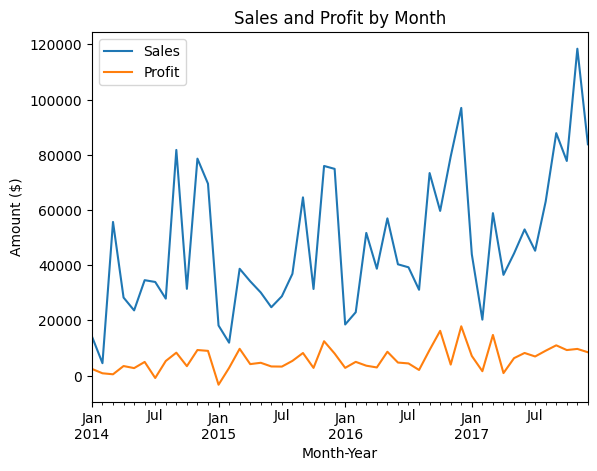

In [5]:
df["Month-Year"] = df["Order Date"].dt.to_period("M")
monthly = df.groupby("Month-Year")[["Sales","Profit"]].sum().reset_index()

monthly.plot(x="Month-Year", y=["Sales","Profit"], kind="line")
plt.title("Sales and Profit by Month")
plt.ylabel("Amount ($)")
plt.show()

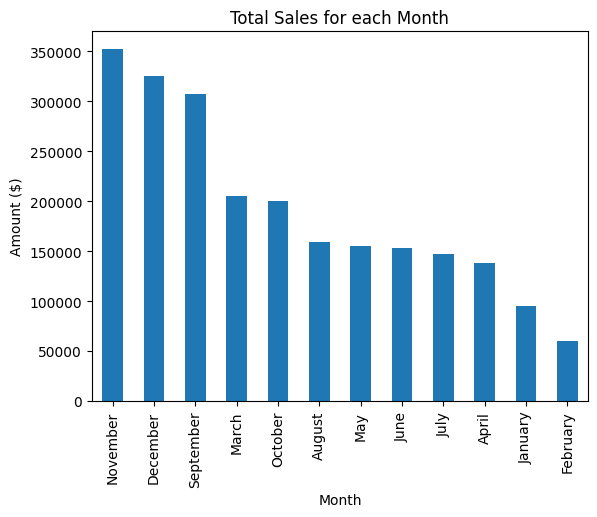

In [6]:
df["Month"] = df["Order Date"].dt.month_name()
df.groupby("Month")["Sales"].sum().sort_values(ascending=False).head(12).plot(kind='bar')

plt.title("Total Sales for each Month")
plt.ylabel("Amount ($)")
plt.show()


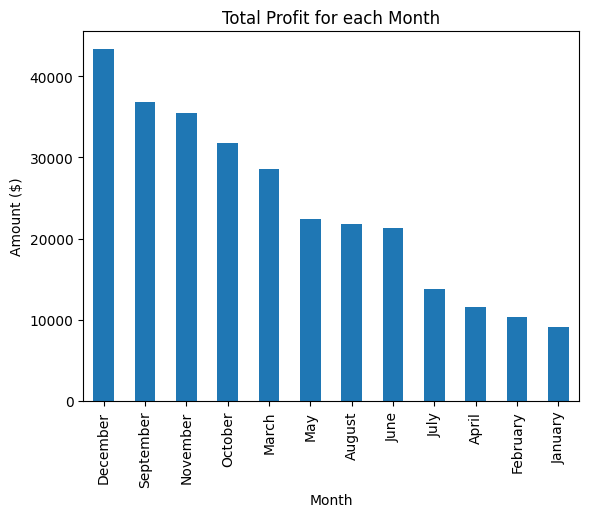

In [7]:
df.groupby("Month")["Profit"].sum().sort_values(ascending=False).head(12).plot(kind='bar')

plt.title("Total Profit for each Month")
plt.ylabel("Amount ($)")
plt.show()

----
### Key Takeaways

This collection of graphs allows us to identify multiple trends in sales and profit, such as:

    - Peak months in December, September, and November.
        - The increase in sales and profit in December and November is likely due to holiday shopping.
        - The increase in sales and profit in September could be attributed to back to school shopping.
    - Low months in February and January
        - This is likely due to the fact that they fall right after the holiday season, meaning that a lot of people do not have the money to spend.
    - General upwards trend in sales throughout the years, showing the growth of the company.
    - Stagnant profit over time, showing that although sales have generally increased, profits have not.

What can we learn from this?

It should be a high priority to push as much quantity and sales during the peak months, making as many sales as possible.

In contrast, during the slow seasons it could be a good idea to order lower quantities of products, as well as potentially having sales and promotions to incentivize customers to spend and to clear out as much inventory as possible.

---------

## How Discounts Affect Sales & Profit

***This Section Includes***

- A Scatterplot to compare Profit and Discount.
- A correlation matrix to find how Discounts relate to Profit, Sales, and Quantity.
- A comparison of profits of sub-categories of products when they are discounted vs non-discounted.

---

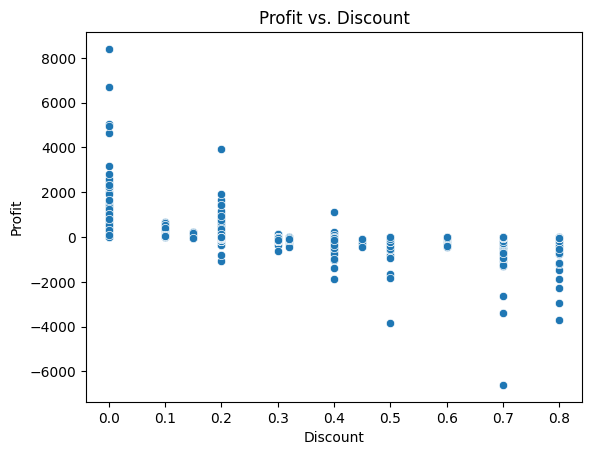

In [39]:
sns.scatterplot(data=df, x="Discount", y="Profit")
plt.title('Profit vs. Discount')
plt.show()

---
This scatterplot shows how profit is generally higher the smaller the discount is.

At very high discount rates, the profit is mostly <= 0. Whereas in the cases of little to no discounts, the sales seem to at least come close to breaking even, with alot of cases making very big profits.

---

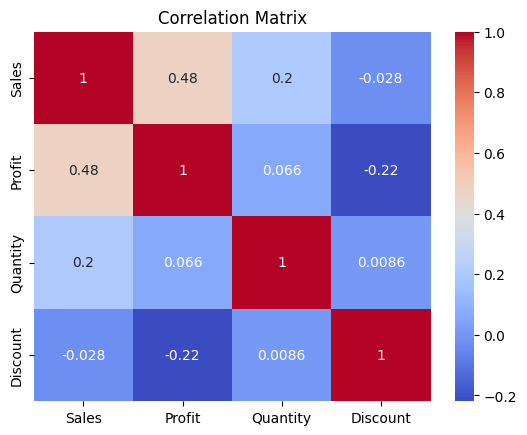

In [9]:
corr = df[["Sales","Profit","Quantity","Discount"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

------
This correlation matrix shows that Discount is not strongly correlated with the other three fields.

The strongest correlation in regards to Discount shows a -0.22 correlation coefficient with Profit. This tells us that there is a weak correlation between discounts going up and profits going down and vice versa.

The correlation between Discount and Sales and Discount and Quantity are both near zero, showing that there is no real change in Sales and Quantity sold between there being discounts or not.

-----

In [11]:
df["Discounted"] = df["Discount"] > 0

profit_comp = df.groupby(["Sub-Category","Discounted"])["Profit"].mean().unstack()
profit_comp.columns = ["No Discount", "With Discount"]

profit_comp

,No Discount,With Discount
Sub-Category,,
Accessories,74.924106,21.866388
Appliances,85.548842,-25.875542
Art,10.804419,3.849619
Binders,116.660091,-7.666684
Bookcases,101.261862,-56.834927
Chairs,164.910497,9.622046
Copiers,1616.187950,436.123696
Envelopes,32.743318,19.482277
Fasteners,5.095353,3.340596


---
This table shows quite clearly, as expected that the profit made on sales is always higher without discounts.

Although there are some categories of products where the profits to not heavily flucuate, such as; Fasteners, Art, and Labels.

The more concerning products are those that show heavy flucuation in profits, especially those that start making losses such as; Tables, Machines, Bookcases, Supplies, and Appliances.

---

### Key Takeaways

- Discounts in general seem to lack effectiveness in both making a profit and pushing quantity.
- As shown by the correlation matrix, Discounts do not generally help to make bigger sales and push more quantity as desired.
- Products in the categories of Tables, Machines, Bookcases, and Appliances, along with others that are negatively impacted by the introduction of discounts, should not have discounts offered to avoid making unnecessary losses on otherwise profitable products.
- Overall, discounts lack impact and should be generally limited in their application.

-----

## Categorical Analysis

***This Section Includes***

- A Comparison of the number of orders by category.
- A Comparison of total sales and profit by category and sub-category.
- A Demonstration of the KMeans clustering process.
- Analysis of the Sales, Profit, Quantity, and Discount between clusters.

----

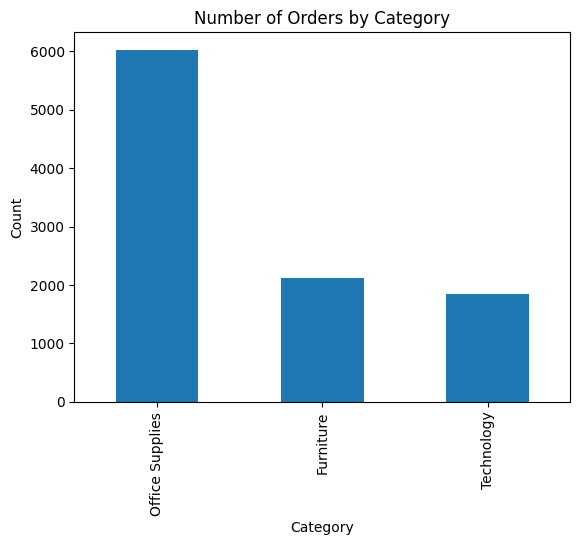

In [7]:
df["Category"].value_counts().plot(kind="bar")
plt.title("Number of Orders by Category")
plt.ylabel("Count")
plt.show()

---
This bar graph shows the number of orders placed for products under each category, showing that products under the category of Office Supplies is by far the most ordered.

---

In [8]:
df.groupby("Category")[["Sales","Profit"]].sum()

,Sales,Profit
Category,,
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8008
Technology,836154.0330,145454.9481


---
This chart shows the total Sales and Profit made by products in each category. This shows clearly that although Furniture has the second highest amount of sales, the profit is by far the lowest, demonstrating that compared to the other categories, furniture is by far the most underperforming.

---

In [9]:
df.groupby("Sub-Category")[["Sales","Profit"]].sum()

,Sales,Profit
Sub-Category,,
Accessories,167380.3180,41936.6357
Appliances,107532.1610,18138.0054
Art,27118.7920,6527.7870
Binders,203412.7330,30221.7633
Bookcases,114879.9963,-3472.5560
Chairs,328449.1030,26590.1663
Copiers,149528.0300,55617.8249
Envelopes,16476.4020,6964.1767
Fasteners,3024.2800,949.5182


---
This chart above shows the total sales and profit made by products in each sub-category.

It follows that products under the categories of Tables, Supplies, and Bookcases have all made a loss throughout the history of selling them. Specifically, Tables are the most concerning, as although they demonstrate high sales, they still turn quite a significant loss.

Categories like Phones, Storage, Copiers, Chairs, Binders, Appliances, and Accessories show quite a high profit for high-selling products, showing that they are quite high-performing products.

While the Paper category shows quite a high amount of profit for relatively lower sales, showing that paper is highly profitable.

---

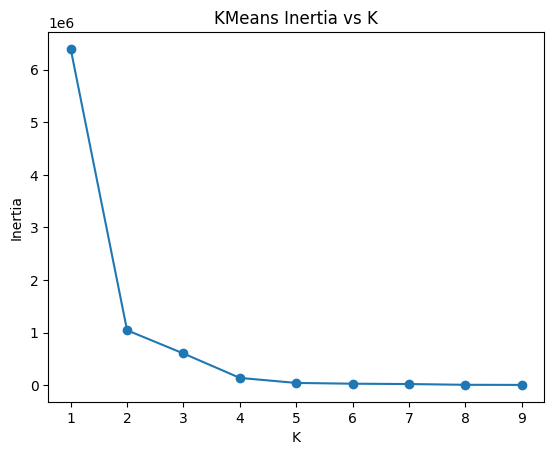

In [8]:
product_data = df.groupby("Sub-Category")[["Sales","Profit","Quantity","Discount"]].mean()

# Normalize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(product_data)

# find the optimal amount of clusters
inertia = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=45)
    kmeans.fit(product_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,10), inertia, marker='o')
plt.title("KMeans Inertia vs K")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.show()

As the plot shows, there is an elbow point at k=3 so we choose that as our number of clusters

---

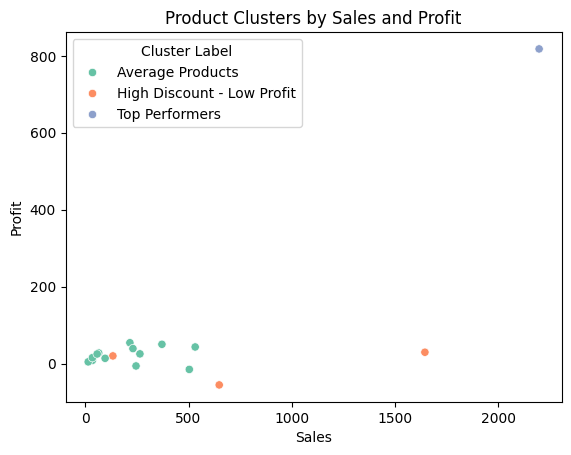

In [17]:
# Since 3 appears to be the approximate elbow point, we choose k=3

# Assign each state to one of 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
product_data["Product-Cluster"] = kmeans.fit_predict(scaled_data)

cluster_labels = {
    0: "Top Performers",
    1: "Average Products",
    2: "High Discount - Low Profit" 
}

product_data["Cluster Label"] = product_data["Product-Cluster"].map(cluster_labels)

sns.scatterplot(data=product_data, x="Sales", y="Profit", hue="Cluster Label", palette="Set2")
plt.title("Product Clusters by Sales and Profit")
plt.show()

---
This graph above shows where the different clusters lay on a chart on Profit vs. Sales.

---

In [18]:
product_data.groupby("Cluster Label")[["Sales","Profit","Discount","Quantity"]].mean()

,Sales,Profit,Discount,Quantity
Cluster Label,,,,
Average Products,204.973908,21.815511,0.111656,3.762319
High Discount - Low Profit,809.302881,-2.096510,0.313221,3.879630
Top Performers,2198.941618,817.909190,0.161765,3.441176


---
This chart shows how the different clusters compare in the four different columns.

We label the three clusters using descriptive labels to describe common trends among the cluster.

---

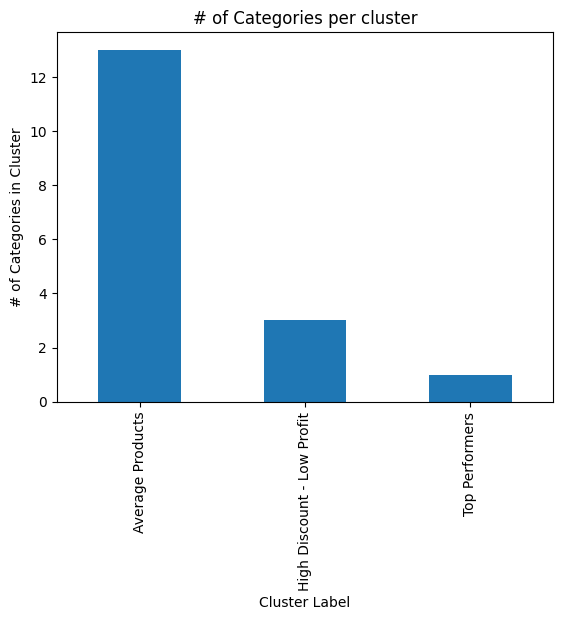

In [19]:
product_data.reset_index().groupby("Cluster Label")["Sub-Category"].count().plot(kind="bar")
plt.ylabel("# of Categories in Cluster")
plt.title("# of Categories per cluster")
plt.show()

---
This bar graph shows the amount of categories put into each cluster, where most categories are put into the "Average Products" cluster.

---

In [20]:
for cluster in sorted(product_data["Cluster Label"].unique()):
    print(f"\n{cluster}:")
    print(product_data[product_data['Cluster Label'] == cluster].index.tolist())


Average Products:
['Accessories', 'Appliances', 'Art', 'Bookcases', 'Chairs', 'Envelopes', 'Fasteners', 'Furnishings', 'Labels', 'Paper', 'Phones', 'Storage', 'Supplies']

High Discount - Low Profit:
['Binders', 'Machines', 'Tables']

Top Performers:
['Copiers']


---
Above is a list of where each category falls into their respective cluster.

---

---
### Key Takeaways

- As seen from the cluster analysis, Copiers has an outstanding performance purely based off of their respective Sales and Profit.
- Binders, Machines, and Tables, as shown from the cluster analysis, are all heavily discounted while providing an overall negative mean profit.
- As seen from the first graph, the overall category of Furniture is significantly less profitable than the other two categories.
- While the average product makes decent profit with limited discounts.
- The lowest performing categories are those that are heavily discounted on average as seen in the cluster analysis, showing once again that discounts are generally not effective while not pushing significantly more quantity than an average product.

---

---
## Segment Analysis

***This Section Includes***

- An analysis of total and mean profit and sales by customer segment.
- Profit margin by customer segment.

---

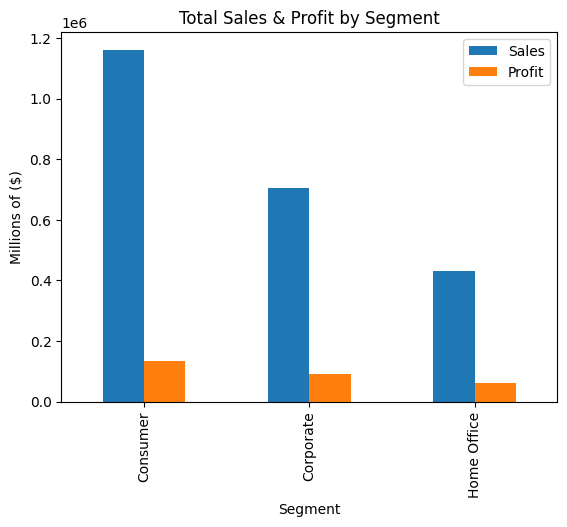

In [17]:
# Segment
df.groupby("Segment")[["Sales","Profit"]].sum().plot(kind='bar')
plt.title("Total Sales & Profit by Segment")
plt.ylabel("Millions of ($)")
plt.show()

---
This plot shows the total sales and profit (in millions of $) of the three customer segments.

This shows that Consumers bring in the most sales, although all segments bring in similar amounts of profit despite varying sales numbers.

---

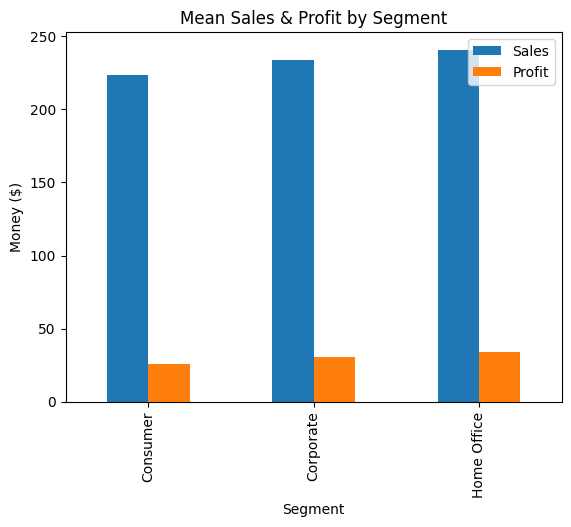

In [18]:
df.groupby("Segment")[["Sales","Profit"]].mean().plot(kind='bar')
plt.title('Mean Sales & Profit by Segment')
plt.ylabel("Money ($)")
plt.show()

---
This chart shows the mean sales and profit made by each segment.

This chart shows that on average, each segment performs very similarily.

---

In [13]:
df.groupby('Segment')["Profit Margin"].mean()

Segment
Consumer       0.112050
Corporate      0.121203
Home Office    0.142870
Name: Profit Margin, dtype: float64

---
This chart shows the average profit margin made by each segment.

This shows that the Home Office segment has the highest profit margin.

---

---
### Key Takeaways

- The profit margin made by each segment is very similar, showing that different segments do not significantly affect proft margin.
- Although the consumer segment has by far the most sales, the profits are relatively low.
- The profit and sales made on average between each segment are very similar showing no significant difference.

---

## Region and State Analysis

***This Section Includes***

- The Top and Bottom 10 states and cities by profit.
- Profit share by region.
- Cluster analysis by states.

---

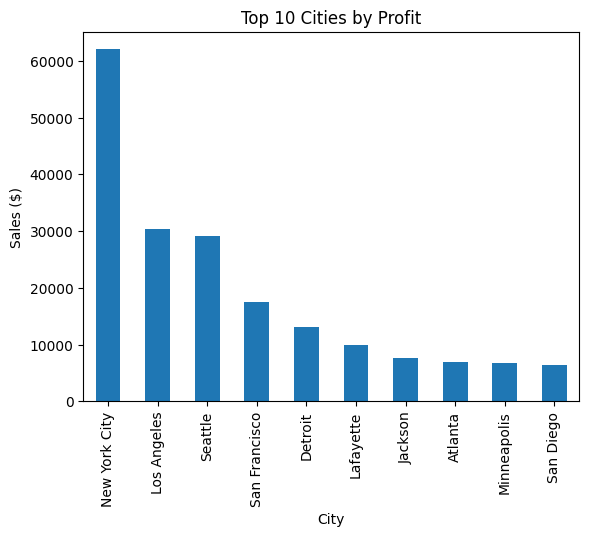

In [35]:
df.groupby("City")["Profit"].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Cities by Profit')
plt.ylabel('Sales ($)')
plt.show()

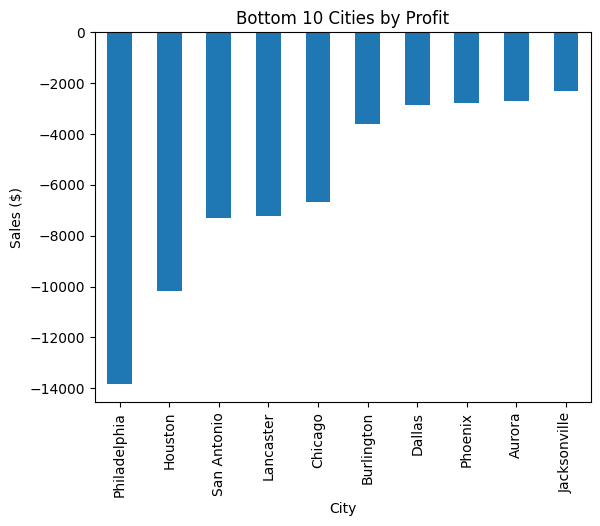

In [36]:
df.groupby("City")["Profit"].sum().sort_values(ascending=True).head(10).plot(kind='bar')
plt.title('Bottom 10 Cities by Profit')
plt.ylabel('Sales ($)')
plt.show()

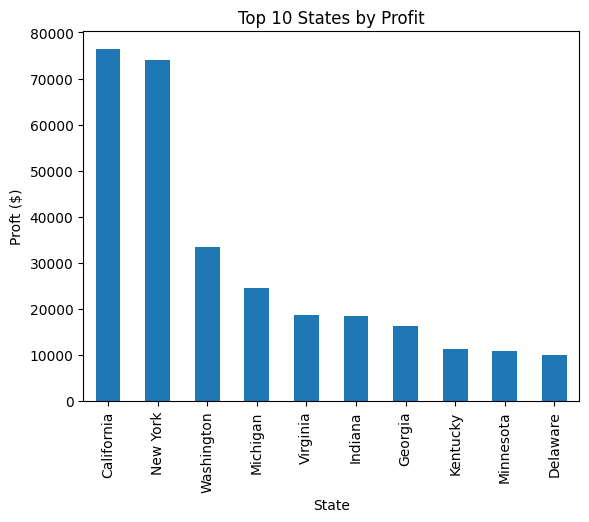

In [37]:
df.groupby("State")["Profit"].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 States by Profit")
plt.ylabel("Proft ($)")
plt.show()

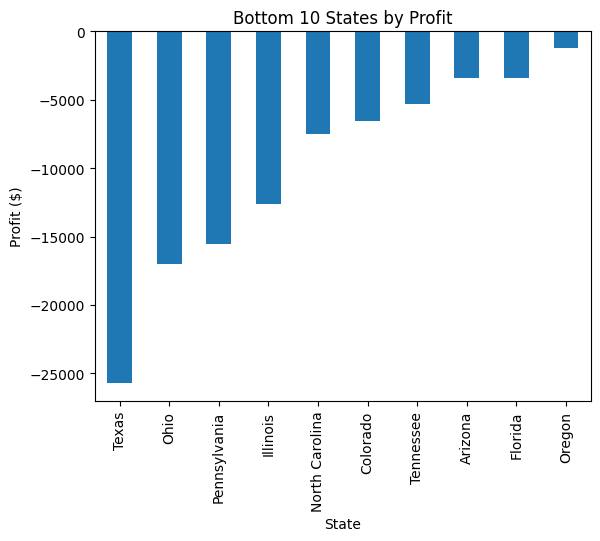

In [38]:
df.groupby("State")["Profit"].sum().sort_values(ascending=True).head(10).plot(kind='bar')
plt.title("Bottom 10 States by Profit")
plt.ylabel("Profit ($)")
plt.show()

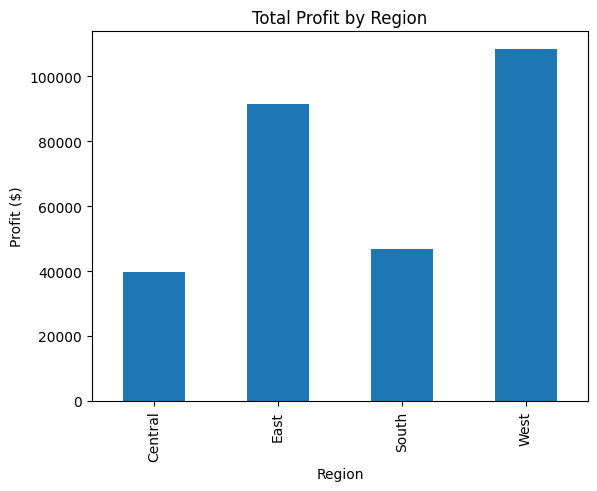

In [39]:
df.groupby("Region")["Profit"].sum().plot(kind='bar')
plt.title("Total Profit by Region")
plt.ylabel("Profit ($)")
plt.show()

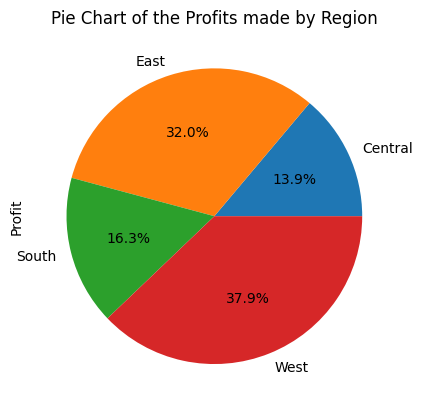

In [40]:
df.groupby("Region")["Profit"].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title("Pie Chart of the Profits made by Region")
plt.show()

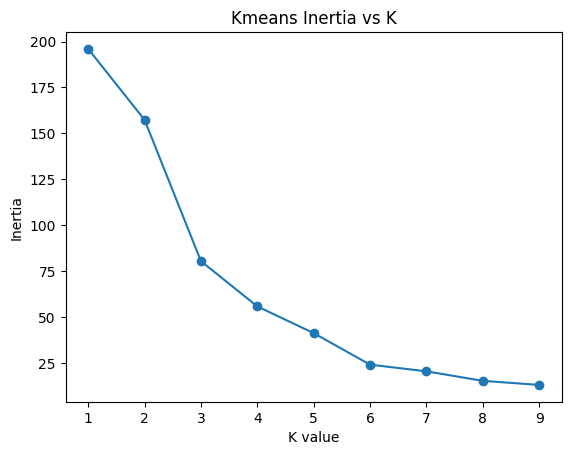

In [42]:
state_data = df.groupby("State")[["Sales","Profit","Discount","Quantity"]].mean()

# Normalize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(state_data)

# find the optimal amount of clusters
inertia = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,10), inertia, marker='o')
plt.ylabel("Inertia")
plt.xlabel("K value")
plt.title("Kmeans Inertia vs K")
plt.show()

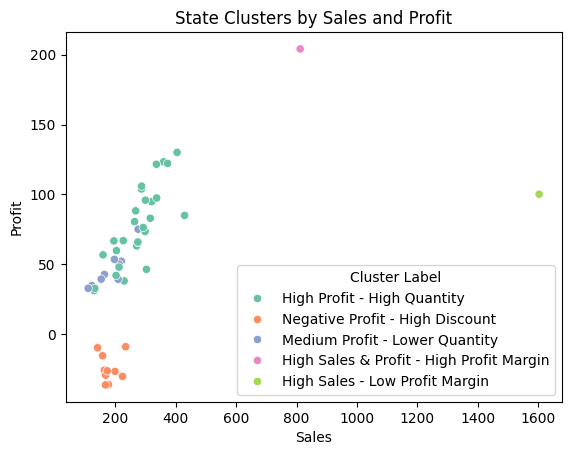

In [32]:
# Since 4 appears to be the approximate elbow point, we choose k=4

# Assign each state to one of 4 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
state_data["State-Cluster"] = kmeans.fit_predict(scaled_data)

cluster_labels = {
    0: "High Profit - High Quantity",
    1: "High Sales - Low Profit Margin",
    2: "Negative Profit - High Discount",
    3: "Medium Profit - Lower Quantity",
    4: "High Sales & Profit - High Profit Margin"
    
}

state_data["Cluster Label"] = state_data["State-Cluster"].map(cluster_labels)

sns.scatterplot(data=state_data, x="Sales", y="Profit", hue="Cluster Label", palette="Set2")
plt.title("State Clusters by Sales and Profit")
plt.show()

In [33]:
state_data["Profit Margin"] = state_data["Profit"] / state_data["Sales"]

state_data.groupby("Cluster Label")[["Sales","Profit","Discount","Quantity","Profit Margin"]].mean()

,Sales,Profit,Discount,Quantity,Profit Margin
Cluster Label,,,,,
High Profit - High Quantity,273.990177,77.381424,0.020240,3.996892,0.280586
High Sales & Profit - High Profit Margin,811.760909,204.088936,0.000000,4.545455,0.251415
High Sales - Low Profit Margin,1603.136000,100.196000,0.200000,4.000000,0.062500
Medium Profit - Lower Quantity,184.305284,46.748948,0.012578,3.468188,0.257556
Negative Profit - High Discount,180.003861,-24.336105,0.319670,3.789877,-0.137455


In [34]:
for cluster in sorted(state_data["Cluster Label"].unique()):
    print(f"\n{cluster}:")
    print(state_data[state_data['Cluster Label'] == cluster].index.tolist())


High Profit - High Quantity:
['Alabama', 'Arkansas', 'California', 'Delaware', 'District of Columbia', 'Georgia', 'Indiana', 'Kentucky', 'Maine', 'Maryland', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nevada', 'New Hampshire', 'New Mexico', 'New York', 'North Dakota', 'Oklahoma', 'Rhode Island', 'South Carolina', 'Utah', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin']

High Sales & Profit - High Profit Margin:
['Vermont']

High Sales - Low Profit Margin:
['Wyoming']

Medium Profit - Lower Quantity:
['Connecticut', 'Idaho', 'Iowa', 'Kansas', 'Louisiana', 'Massachusetts', 'Nebraska', 'New Jersey', 'South Dakota']

Negative Profit - High Discount:
['Arizona', 'Colorado', 'Florida', 'Illinois', 'North Carolina', 'Ohio', 'Oregon', 'Pennsylvania', 'Tennessee', 'Texas']


In [ ]:
# Shipping

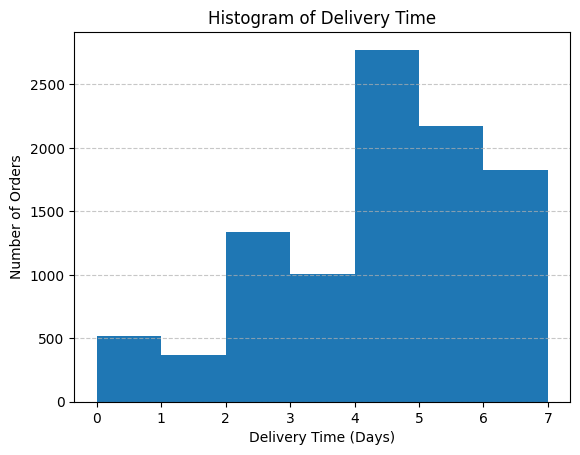

In [26]:
plt.hist(df["Delivery Time"], bins=range(df["Delivery Time"].min(),df["Delivery Time"].max() +1))
plt.xticks(range(df['Delivery Time'].min(), df['Delivery Time'].max() + 1))
plt.title("Histogram of Delivery Time")
plt.xlabel("Delivery Time (Days)")
plt.ylabel("Number of Orders")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

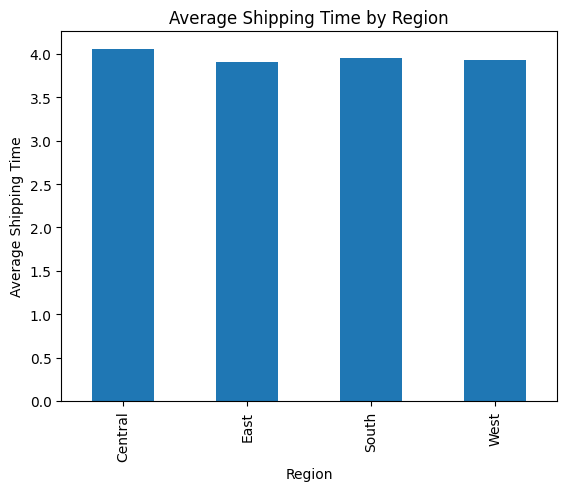

In [29]:
df.groupby('Region')['Delivery Time'].mean().plot(kind='bar')
plt.title('Average Shipping Time by Region')
plt.ylabel('Average Shipping Time')
plt.show()

In [27]:
df.groupby("Ship Mode")["Delivery Time"].mean()

Ship Mode
First Class       2.182705
Same Day          0.044199
Second Class      3.238046
Standard Class    5.006535
Name: Delivery Time, dtype: float64

<Axes: xlabel='Ship Mode', ylabel='Delivery Time'>

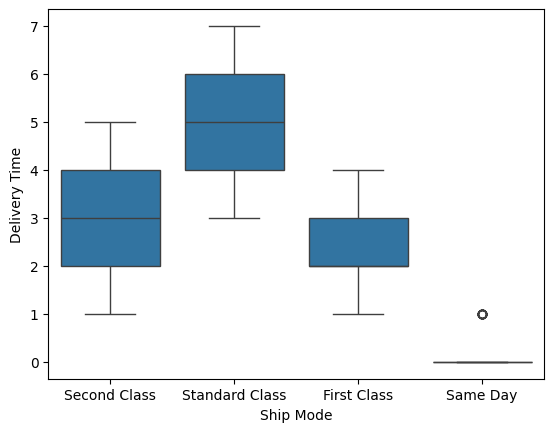

In [28]:
sns.boxplot(x="Ship Mode",y="Delivery Time",data=df)

In [ ]:
# Future Predictions

<Axes: xlabel='Order Date'>

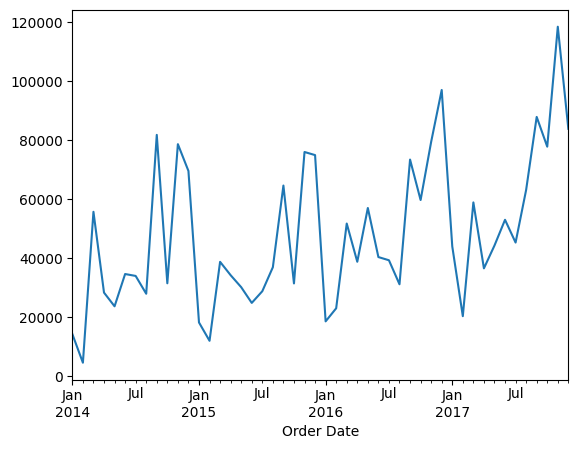

In [6]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

monthly_sales = df.set_index("Order Date").resample("ME")["Sales"].sum()
monthly_sales.plot()

In [7]:
result = adfuller(monthly_sales)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -4.493767844002665
p-value: 0.00020180198458237758


In [12]:
# Since the p-value is < 0.05 the data is stationary

model = auto_arima(monthly_sales, seasonal=True, m=12, trace=True)

model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1079.882, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1098.402, Time=0.00 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1077.114, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1078.127, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1096.548, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1091.142, Time=0.01 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=1078.911, Time=0.05 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1079.082, Time=0.04 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1081.816, Time=0.04 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=1080.489, Time=0.12 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1084.759, Time=0.02 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=1073.411, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=1087.909, Time=0.01 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=1075.137, Time=0.08 sec
 ARIMA(2,1,0)(1,0,1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   48
Model:             SARIMAX(2, 1, 0)x(1, 0, 0, 12)   Log Likelihood                -531.846
Date:                            Thu, 24 Jul 2025   AIC                           1071.693
Time:                                    15:38:21   BIC                           1079.093
Sample:                                01-31-2014   HQIC                          1074.477
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6248      0.216     -2.894      0.004      -1.048      -0.202
ar.L2         -0.2656      0.218     -1.219      0.223      -0.692       0.161
ar.S.L12       0.6270      0.178      3.519      0.000       0.278       0.976
sigma2       5.34e+08   1.15e-10   4.63e+18      0.000    5.34e+08    5.34e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                 2.70
Prob(Q):                              0.63   Prob(JB):                         0.26
Heteroskedasticity (H):               0.54   Skew:                            -0.43
Prob(H) (two-sided):                  0.23   Kurtosis:                         3.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

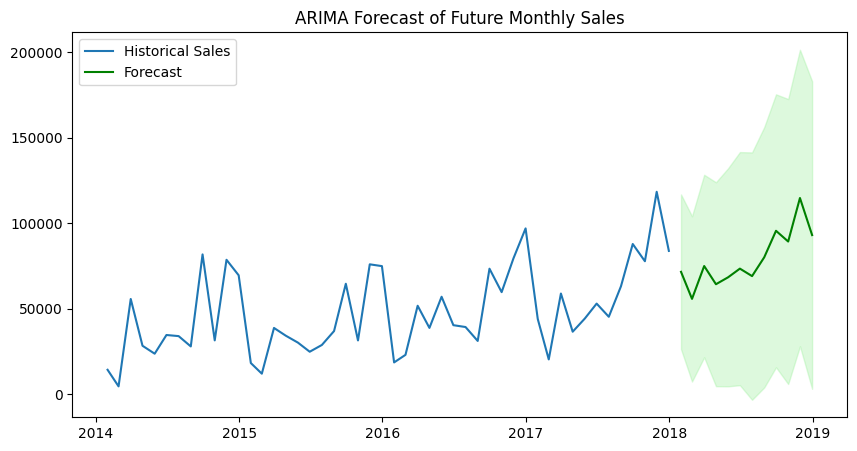

In [16]:
forecast, conf_int = model.predict(n_periods=12, return_conf_int=True)

future_dates = pd.date_range(monthly_sales.index[-1] + pd.offsets.MonthBegin(1), periods=12, freq='M')
forecast_series = pd.Series(forecast, index=future_dates)

plt.figure(figsize=(10, 5))
plt.plot(monthly_sales, label="Historical Sales")
plt.plot(forecast_series, label="Forecast", color='green')
plt.fill_between(future_dates, conf_int[:, 0], conf_int[:, 1], color='lightgreen', alpha=0.3)
plt.legend()
plt.title("ARIMA Forecast of Future Monthly Sales")
plt.show()